# CONTENT
1. [Exploratory Data Analysis](#EDA)
2. [Data Cleaning](#DataCleaning)
3. [Hyperparameter Optimization](#GS)

In [1]:
import pandas as pd
import numpy as np

In [2]:
# assign testing data
test_data = pd.read_csv("test.csv")
# assign training data to a pandas DataFrame
train_data = pd.read_csv("train.csv")

In [3]:
# # split features and label
# X = train_data.drop(columns='Survived', axis=1)
# y = train_data['Survived']

# X_test = test_data

# # check shape
# X.shape, X_test.shape, y.shape

<a name="EDA"> </a>
# Exploratory Data Analysis

In [4]:
# print the first 5 rows of the data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Note**: 
1. Features *Name*, *Sex*, *Ticket*, *Cabin*, *Embarked* are of type **object** which will have to address via **OneHot** or **Ordinal Encoding**.
2. Features have **different scales** which will have to address via **Standardization**.
3. Features *Age* and *Cabin* have missing values which will have to address via removing the specific rows, the whole column, or fill the NaN with a specified value (e.g. mean, median, mode).

In [5]:
# set PassengerId as the index column
train_data = train_data.set_index("PassengerId")
test_data = test_data.set_index("PassengerId")

In [6]:
# print some basic information per column
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Note**:
1. **Cabin** has only 204 out of 891 instances. It might be better to remove the column as a whole.
2. We have a fairly **small dataset** (891 rows x 12 columns) which will influence our algorithm's choice.

In [7]:
# check how many unique instances we have in the embarked feature
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
# check the same as above for Pclass
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
# check the proportion for the Sex variable

# calculate the total number of passengers
total = train_data['Sex'].value_counts().sum()
# calculate the proportion of men
men = (train_data['Sex'].value_counts()[0] / total) *100 

# print the proportion of men to 2 decimal places
print("Proportion of men: {:.2f}%".format(men, 2))
# calculate and print the proportion of women to 2 decimal places
print("Proportion of women: {:.2f}%".format(100-men))

Proportion of men: 64.76%
Proportion of women: 35.24%


In [10]:
# print a statistical summary of the numerical variables
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fare'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>]], dtype=object)

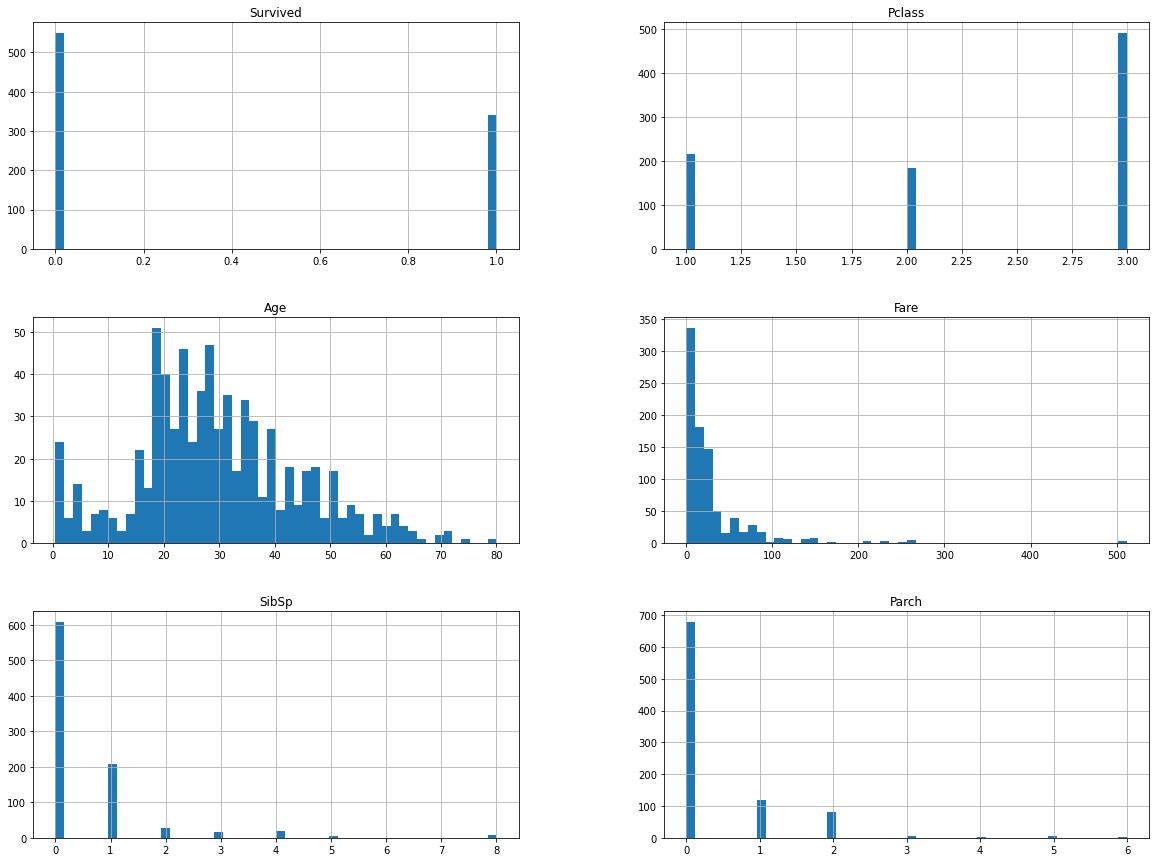

In [11]:
# visualize variables with histograms to aid in pattern recognition
%matplotlib inline
import matplotlib.pyplot as plt
train_data[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']].hist(bins=50, figsize=(20, 15))

In [45]:
# checking correlations
corr_matrix = train_data.corr()

# check the relationship of the attributes with the target
corr_matrix["Survived"].sort_values(ascending=False)

Survived            1.000000
Fare                0.257307
Parch               0.081629
RelativesOnboard    0.016639
SibSp              -0.035322
Age                -0.077221
Pclass             -0.338481
Name: Survived, dtype: float64

In [13]:
# print a correlation table
train_data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

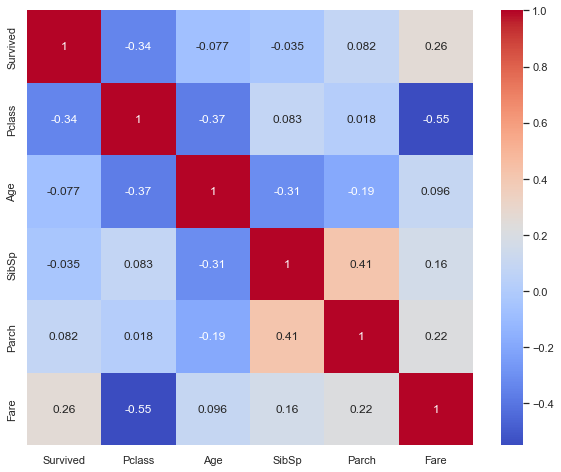

In [14]:
# visualize the corr_matrix as a heatmap
import seaborn as sns

# set figure size
sns.set(rc={'figure.figsize':(10,8)})
# generate a heatmap
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm')

**Note**:
1. From the correlation matrix and/or heatmap above we can see that there is no **multi-collinearity** (= high relationship between pairs of independent variables), which is good.
2. As expected *PassengerID* has **no linear relationship with the target variable**.
3. Features *SibSp*, *Age*, *Parch* have **very low linear relationship with the target variable**.

<a name="DataCleaning"> </a>
# Data Cleaning

We will try to address our observations so far:

1. Missing values, duplicated rows & low relationship features
3. Categorical Variables
4. Feature Scaling

## Missing values, duplicated rows & low relationship features

In [15]:
# check missing values per column
train_data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [18]:
# check for duplicate rows
train_data.duplicated().sum()

0

## Feature Scaling

**Note**:
We will need to convert these categorical variables into numerical format. Usually we do it via the use of:
1. **Ordinal Encoding**
2. **One-Hot Encoding**

The former makes the assumption that two nearby values are more similar than two distant values, which does not fit in this case. Hence, we will use the latter method.

Create a **Pipeline for the numerical variables**:
1. Replace missing values with the mean.
2. Standardize the values.

Create a **Pipeline for the categorical variables**:
1. Replace missing values with the mode.
2. Apply OneHotEncoding.

**Note**
1. I believe that is worth removing the entire *Cabin* feature (not including it in the pipeline).
2. I believe it is worth replacing *Age* missing values with the mean.
3. I believe it is worth replacing *Embarked* missing values with the mode.

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    # replace missing values with the mean
    ("imputer", SimpleImputer(strategy="mean")),
    # apply standardization
    ("scaler", StandardScaler())
])

# create a pipeline for the categorical features
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    # replace missing values with the mode
    ("imputer", SimpleImputer(strategy="most_frequent")),
    # convert categorical features into numerical using OneHotEncoding
    ("cat_encoder", OneHotEncoder(sparse=False)),
])

from sklearn.compose import ColumnTransformer

# numerical features
num_attribs = ["Age", "SibSp", "Parch", "Fare"]
# categorical features
cat_attribs = ["Pclass", "Sex", "Embarked"]

# join the two pipelines together
preprocess_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [20]:
# apply our pipeline to training data
X_train = preprocess_pipeline.fit_transform(train_data[num_attribs + cat_attribs])

# assign our target variable
y_train = train_data["Survived"]

<a name="SelectTrain"> </a>
# Select and Train Models
1. Decision Tree
2. Random Forest
3. Gradient Boosting
4. Support Vector Machine

## Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

# create an instance
dt_clf = DecisionTreeClassifier(random_state=42)

# fit model with training data
dt_clf.fit(X_train, y_train)

# accuracy score using Cross-Validation
from sklearn.model_selection import cross_val_score, StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

scores_dt = cross_val_score(dt_clf, X_train, y_train,
                            scoring='accuracy', cv=skf)

np.mean(scores_dt)

0.7777528089887641

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(dt_clf, X_train, y_train, cv=10)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[458,  91],
       [100, 242]], dtype=int64)

## Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

# create an instance
rf_clf = RandomForestClassifier()

# fit model with training data
rf_clf.fit(X_train, y_train)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

scores_rf = cross_val_score(rf_clf, X_train, y_train,
                            scoring='accuracy', cv=skf)

np.mean(scores_rf)

0.8114357053682897

In [24]:
y_train_pred_rf = cross_val_predict(rf_clf, X_train, y_train, cv=10)
conf_mx_rf = confusion_matrix(y_train, y_train_pred_rf)
conf_mx_rf

array([[467,  82],
       [ 96, 246]], dtype=int64)

## Gradient Boosting

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()
gb_scores = cross_val_score(gb_clf, X_train, y_train, cv=10)
gb_scores.mean()

0.826067415730337

In [39]:
from sklearn.model_selection import GridSearchCV

# hyperparameter optimization
param_grid = [
    {'learning_rate': [0.01, 0.1, 1],
     'n_estimators': [10, 100, 150],
    }
]

# set GS settings
gs = GridSearchCV(gb_clf, param_grid, cv=10, scoring='accuracy', return_train_score=True)

# fit GS to the training data
gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid=[{'learning_rate': [0.01, 0.1, 1],
                          'n_estimators': [10, 100, 150]}],
             return_train_score=True, scoring='accuracy')

In [42]:
# build the model using the best params
gb_model = gs.best_estimator_

# get the best parameters
gs.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [43]:
# cross-validate our final model
model_gb_scores = cross_val_score(gb_model, X_train, y_train, cv=10)

# print the mean accuracy
model_gb_scores.mean()

0.826067415730337

## Support Vector Machine

In [25]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.8260549313358302

In [26]:
y_train_pred_svm = cross_val_predict(svm_clf, X_train, y_train, cv=10)
conf_mx_svm = confusion_matrix(y_train, y_train_pred_svm)
conf_mx_svm

array([[491,  58],
       [ 97, 245]], dtype=int64)

<a name="GS"> </a>
# Hyperparameter Optimization

In [28]:
from sklearn.model_selection import GridSearchCV

# hyperparameter optimization
param_grid = [
    {'C': [0.01, 0.1, 1, 10], 'kernel': ['linear']},
    {'C': [0.01, 0.1, 1, 10], 'kernel': ['rbf'], 'gamma': [0.01, 0.1, 1]},
    {'C': [0.01, 0.1, 1, 10], 'kernel': ['poly'], 'degree': [2, 4, 6], 'gamma': [0.01, 0.1, 1]},
    {'C': [0.01, 0.1, 1, 10], 'kernel': ['sigmoid'], 'gamma': [0.01, 0.1, 1]}
]

# create an instance
svm_clf = SVC()

# set GS settings
gs = GridSearchCV(svm_clf, param_grid, cv=10, scoring='accuracy', return_train_score=True)

# fit GS to the training data
gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 10], 'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                          'kernel': ['rbf']},
                         {'C': [0.01, 0.1, 1, 10], 'degree': [2, 4, 6],
                          'gamma': [0.01, 0.1, 1], 'kernel': ['poly']},
                         {'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                          'kernel': ['sigmoid']}],
             return_train_score=True, scoring='accuracy')

In [29]:
# build the model using the best params
final_model = gs.best_estimator_

# get the best parameters
gs.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [30]:
# cross-validate our final model
final_model_scores = cross_val_score(final_model, X_train, y_train, cv=10)

# print the mean accuracy
final_model_scores.mean()

0.8294382022471909

In [31]:
# print the confusion matrix
y_train_pred_final = cross_val_predict(final_model, X_train, y_train, cv=10)
conf_mx_svm = confusion_matrix(y_train, y_train_pred_final)
conf_mx_svm

array([[513,  36],
       [116, 226]], dtype=int64)

In [32]:
# predict on test data
X_test = preprocess_pipeline.transform(test_data[num_attribs + cat_attribs])

final_predictions = final_model.predict(X_test)

Construct a DataFrame as required by Kaggle.

In [34]:
output = pd.DataFrame({'PassengerId': test_data.index, 'Survived': final_predictions})
output.to_csv('submission_titanic_svm.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
